In [139]:
%matplotlib notebook

In [75]:
import numpy as np
from scipy.sparse import spdiags
import scipy
from types import SimpleNamespace

import matplotlib.pyplot as plt

In [3]:

class MatrixParameters(SimpleNamespace):
    """docstring for Params"""

    def __init__(self, L=10, m=64, nu=0.001, tspan=[0, 4], tstepsize=0.5):
        self.L = L
        self.m = m
        self.n = m * m
        self.nu = nu
        self.tstepsize = tstepsize
        self.tspan = np.arange(tspan[0], tspan[1] + 1, tstepsize)
        # self.guassian_bump_param_y = 20


In [4]:
params = MatrixParameters()

In [16]:
xyspan=np.linspace(-params.L,params.L, params.m + 1)[0:-1]

In [17]:
xyspan

array([-10.    ,  -9.6875,  -9.375 ,  -9.0625,  -8.75  ,  -8.4375,
        -8.125 ,  -7.8125,  -7.5   ,  -7.1875,  -6.875 ,  -6.5625,
        -6.25  ,  -5.9375,  -5.625 ,  -5.3125,  -5.    ,  -4.6875,
        -4.375 ,  -4.0625,  -3.75  ,  -3.4375,  -3.125 ,  -2.8125,
        -2.5   ,  -2.1875,  -1.875 ,  -1.5625,  -1.25  ,  -0.9375,
        -0.625 ,  -0.3125,   0.    ,   0.3125,   0.625 ,   0.9375,
         1.25  ,   1.5625,   1.875 ,   2.1875,   2.5   ,   2.8125,
         3.125 ,   3.4375,   3.75  ,   4.0625,   4.375 ,   4.6875,
         5.    ,   5.3125,   5.625 ,   5.9375,   6.25  ,   6.5625,
         6.875 ,   7.1875,   7.5   ,   7.8125,   8.125 ,   8.4375,
         8.75  ,   9.0625,   9.375 ,   9.6875])

In [7]:
xyspan.size

65

In [8]:
xyspan = xyspan[0:-1]

In [9]:
xyspan

array([-10.    ,  -9.6875,  -9.375 ,  -9.0625,  -8.75  ,  -8.4375,
        -8.125 ,  -7.8125,  -7.5   ,  -7.1875,  -6.875 ,  -6.5625,
        -6.25  ,  -5.9375,  -5.625 ,  -5.3125,  -5.    ,  -4.6875,
        -4.375 ,  -4.0625,  -3.75  ,  -3.4375,  -3.125 ,  -2.8125,
        -2.5   ,  -2.1875,  -1.875 ,  -1.5625,  -1.25  ,  -0.9375,
        -0.625 ,  -0.3125,   0.    ,   0.3125,   0.625 ,   0.9375,
         1.25  ,   1.5625,   1.875 ,   2.1875,   2.5   ,   2.8125,
         3.125 ,   3.4375,   3.75  ,   4.0625,   4.375 ,   4.6875,
         5.    ,   5.3125,   5.625 ,   5.9375,   6.25  ,   6.5625,
         6.875 ,   7.1875,   7.5   ,   7.8125,   8.125 ,   8.4375,
         8.75  ,   9.0625,   9.375 ,   9.6875])

In [10]:
X, Y = np.meshgrid(xyspan, xyspan)

In [11]:
X

array([[-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       ...,
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875]])

In [12]:
X.shape

(64, 64)

In [13]:
omega_0=np.exp(- (X ** 2) - ((Y ** 2) / 20))

In [26]:
omega_0.shape
omega_col = omega_0.reshape(-1)
omega_col.shape

(4096,)

In [22]:
omega_0.shape

(64, 64)

<IPython.core.display.Javascript object>


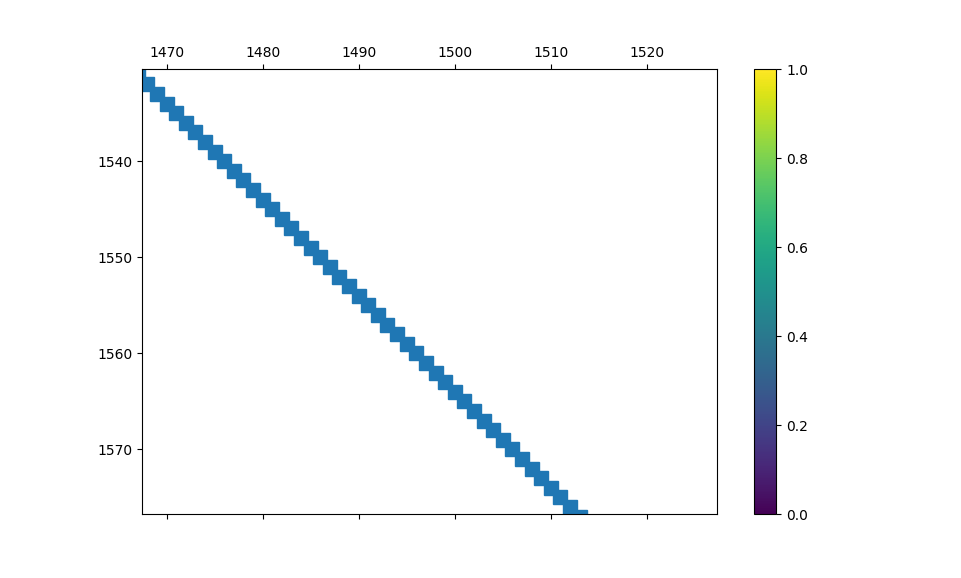

In [15]:
plt.imshow(omega_0)
plt.colorbar()

plt.show()

In [28]:
n=64

In [30]:
e1 = np.ones(n**2)

In [31]:
e1

array([1., 1., 1., ..., 1., 1., 1.])

In [33]:
e1.shape

(4096,)

In [35]:
B_diags = [-(n * (n -1)), -n, n, (n * (n -1))]

In [36]:
B_diags

[-4032, -64, 64, 4032]

In [37]:
nn = n**2

In [38]:
nn

4096

In [39]:
B = spdiags([e1, -e1, e1, -e1], B_diags, nn, nn)

<IPython.core.display.Javascript object>


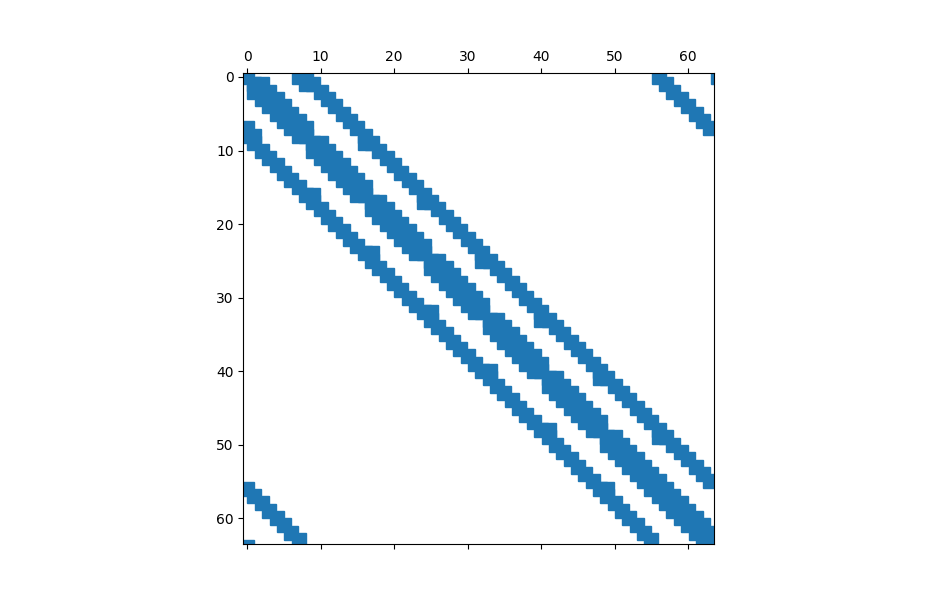

In [43]:
plt.spy(B)
plt.show()

In [44]:
dx = 0.3125

In [54]:
B = B/(2*dx)

In [53]:
B.toarray()[0][50:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
b_c = B.toarray()[0][50:100]


In [65]:
b_c[14]


1.6

In [70]:
B.toarray()[0, 50 + 14]

1.6

In [72]:
C_diags = [-1 1]

SyntaxError: invalid syntax (<ipython-input-72-13d0905dfb10>, line 1)

In [73]:
for x in B:
    x


TypeError: 'dia_matrix' object is not subscriptable

In [84]:
N =20
x = scipy.sparse.lil_matrix( (N,N) )

In [85]:
x.toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [80]:
import random

In [81]:
for _ in range(N):
    x[random.randint(0,N-1),random.randint(0,N-1)]=random.randint(1,100)

In [86]:
x[4, 6]

0.0

In [87]:
x

<20x20 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in LInked List format>

In [97]:
B2= B.tocsr()

In [104]:
B2[0, 64] = 1.1

In [114]:

def create_C(n, dx):
    nn = n ** 2
    e1 = np.ones(nn)
    C_diags = [-1, 1]
    C = spdiags([-e1, e1], [-1, 1], nn, nn)
    C = C.tolil()

    for j in range(0, n - 1):
        C[n * j + 1, (j + 1) * n] = -1
        C[(j + 1) * n, n * j + 1] = 1
        C[(n * j + 1), (n * j)] = 0
        C[(n * j), (n * j + 1)] = 0

    C = C / (2 * dx)
    return C

In [115]:
C = create_C(8, dx)

In [116]:
n = 8
nn = n ** 2
e1 = np.ones(nn)
C2 = spdiags([-e1, e1], [-1, 1], nn, nn)

In [117]:
C2

<64x64 sparse matrix of type '<class 'numpy.float64'>'
	with 126 stored elements (2 diagonals) in DIAgonal format>

In [118]:
np.dot(C2, C)

<64x64 sparse matrix of type '<class 'numpy.float64'>'
	with 202 stored elements in Compressed Sparse Row format>

In [122]:
e0 = np.zeros([nn, 1])


In [125]:
e0.shape

(64, 1)

In [126]:
nn

64

In [127]:
C

<64x64 sparse matrix of type '<class 'numpy.float64'>'
	with 126 stored elements in LInked List format>

In [128]:
size(C)

NameError: name 'size' is not defined

In [129]:
C.size

126

In [130]:
C.shape

(64, 64)

In [132]:
C[0, 63]

0.0

In [133]:

def create_A(n, dx, A_11=2, diagonal_constant=-4):
    """
    Creates A matrix.
    #Arguments function
    """
    nn = n * n
    dd = -4 * np.ones(nn)
    e1 = np.ones(nn)

    A_d = spdiags(dd, [0], nn, nn)

    A_y = spdiags([e1, e1], [-1, 1], nn, nn)

    # need this to iterate through
    A_y = A_y.tolil()
    A_y[0, n - 1] = 1
    A_y[n - 1, 0] = 1

    for j in range(0, n - 1):
        A_y[n * j + 1, (j + 1) * n] = 1
        A_y[(j + 1) * n, n * j + 1] = 1
        A_y[(n * j + 1), (n * j)] = 0
        A_y[(n * j), (n * j + 1)] = 0

    A_x_diags = [-((n - 1) * n), -n, n, ((n - 1) * n)]
    A_x = spdiags([e1, e1, e1, e1], A_x_diags, nn, nn)
    A = A_d + A_x + A_y
    A[0, 0] = A_11

    A = A / (dx**2)
    return A

In [136]:
A = create_A(8, dx)

In [280]:
n = 8
A_11=2 
diagonal_constant=-4
nn = n * n
dd = -4 * np.ones(nn)
e1 = np.ones(nn)

A_d = spdiags(dd, [0], nn, nn)

ey = np.zeros(n)
ey[0] = 1
ey = np.tile(ey, 8)
A_y = spdiags([e1, e1], [-1, 1], nn, nn)

# need this to iterate through
A_y = A_y.tolil()

for j in range(0, n - 1):
    A_y[n * j, (j + 1) * n - 1] = 1
    A_y[(j + 1) * n - 1, n * j] = 1
    A_y[(j + 1) * n, (j + 1) * n - 1] = 0 
    A_y[(j + 1) * n - 1, (j + 1) * n] = 0 

A_y[nn - 1, -n] = 1
A_y[nn - n, -1] = 1

A_x_diags = [-((n - 1) * n), -n, n, ((n - 1) * n)]
A_x = spdiags([e1, e1, e1, e1], A_x_diags, nn, nn)
A = A_d + A_x + A_y
A[0, 0] = A_11

A = A / (dx**2)

<IPython.core.display.Javascript object>


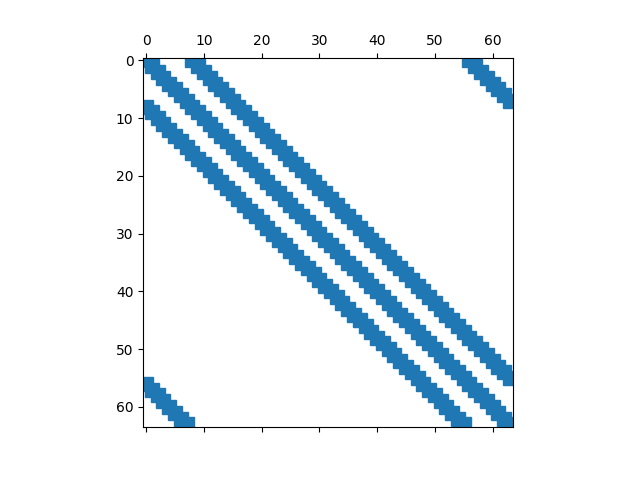

In [283]:
plt.spy(A_d)

In [284]:
def create_B(n, dx):
    nn = n ** 2
    e1 = np.ones(nn)
    B_diags = [-(n * (n - 1)), -n, n, (n * (n - 1))]

    B = spdiags([e1, -e1, e1, -e1], B_diags, nn, nn)
    B = B / (2 * dx)
    return B

In [290]:

def create_C(n, dx):
    nn = n ** 2
    e1 = np.ones(nn)
    C = spdiags([-e1, e1], [-1, 1], nn, nn)
    C = C.tolil()

    for j in range(0, n - 1):
        C[n * j, (j + 1) * n - 1] = -1
        C[(j + 1) * n - 1, n * j] = 1
        C[(j + 1) * n, (j + 1) * n - 1] = 0
        C[(j + 1) * n - 1, (j + 1) * n] = 0

    C[nn - 1, -n] = 1
    C[nn - n, -1] = 1
    C = C / (2 * dx)
    return C

In [291]:
C = create_C(8, dx)

In [292]:
plt.spy(C)

<IPython.core.display.Javascript object>